<a href="https://colab.research.google.com/github/N2000-hack/EmoSense/blob/main/Final_Code_HCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Below Code is used to clone the EmoSense repository from my GitHub into this current working directory. Then, %cd emotion_recognition changes the directory to the emotion_recognition folder within the cloned repository.

In [1]:
!git clone https://github.com/N2000-hack/EmoSense.git
%cd emotion_recognition

Cloning into 'EmoSense'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 0), reused 14 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 8.89 MiB | 19.87 MiB/s, done.
[Errno 2] No such file or directory: 'emotion_recognition'
/content


Here is the code to Install OpenCV. It is used for image processing, object detection and recognition, face recognition and detection.

In [2]:
!pip install --user opencv-contrib-python

In [3]:
#Numpy is used for numerical computing
import numpy as np
#cv2_imshow is used for display
from google.colab.patches import cv2_imshow
#argparse is used for parsing
import argparse
# matplotlib.pyplot is used for Visualization
import matplotlib.pyplot as plt
#cv2 is Computer Vision
import cv2
#tensorflow.keras.models is used for deep learning models
#Sequential is used for building neural networks in a linear stack of layers
from tensorflow.keras.models import Sequential
#Dense , Dropout, Flatten is used for neural networks
from tensorflow.keras.layers import Dense, Dropout, Flatten
#Conv2D is used for filtering
from tensorflow.keras.layers import Conv2D
#Adam is used for optimization
from tensorflow.keras.optimizers import Adam
#MaxPooling2D is used for downsampling
from tensorflow.keras.layers import MaxPooling2D
#ImageDataGenerator is used for generating data from the image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#os is used for interacting with the operating system
import os

In [16]:
mode = "display"

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

def emotion_recog(frame):
  model.load_weights('/content/EmoSense/model.h5')

  #cv2.oc1.setUseOpenCL(False)

  emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Suprised"}

  facecasc = cv2.CascadeClassifier('/content/EmoSense/haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48,48)),-1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(frame, emotion_dict[maxindex], (x+20,y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return frame

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [7]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


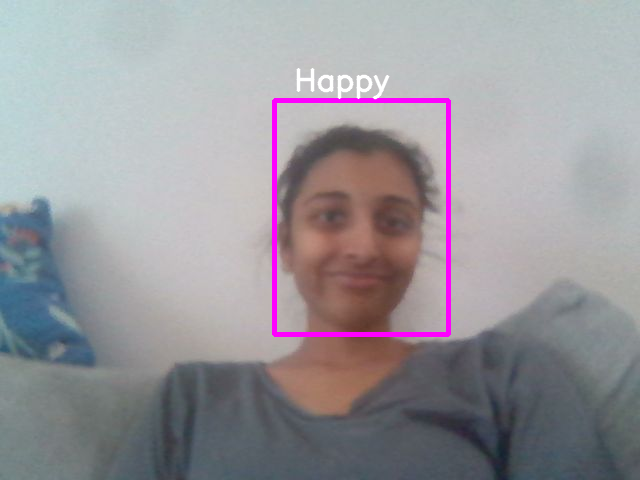

In [19]:
input = cv2.imread("/content/photo.jpg")
output = emotion_recog(input)
cv2_imshow(output)